In [1]:
import os
import glob

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_ett_roi_inference import ARGUS_ett_roi_inference

In [2]:
ett_roi = ARGUS_ett_roi_inference(config_file_name="../ARGUS/ARGUS_ett_roi.cfg", network_name="vfold", device_num=0)

In [3]:
ett_roi_best_models = [[0,0]]
ett_roi.num_models = len(ett_roi_best_models)

for i,r in enumerate(ett_roi_best_models):
    model_name = os.path.join("Results", "ett_run"+str(r[0]), "best_model_"+str(r[1])+".pth")
    ett_roi.load_model(i, model_name)

In [4]:
vids = glob.glob("./Data_ETT/original/Positives/*/*mp4")
#vids = glob.glob("./Data_ETT/original/Negatives/*/*mp4")
           
vid = ARGUS_load_video(vids[1])

In [5]:
print(vid.shape)

(627, 1080, 912)


In [6]:
ett_roi.volume_preprocess(vid)

In [7]:
img = ett_roi.input_image
img_size = img.GetLargestPossibleRegion().GetSize()

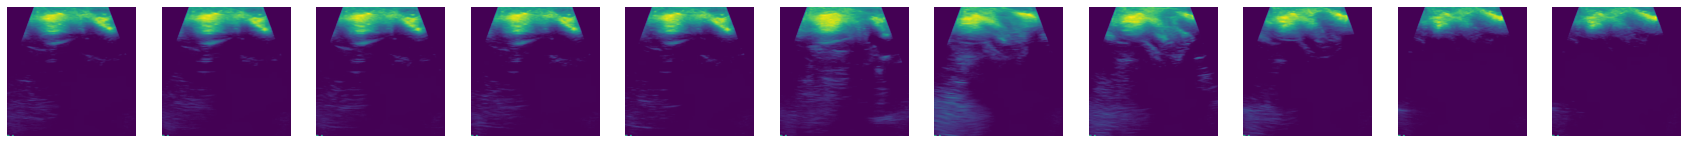

In [8]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

num_slices = img.shape[0]
plt.figure(figsize=[30, 30])
step = num_slices//10
for c in range(0,num_slices,step):
    plt.subplot(
        1,
        11,
        c//step + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(img[c, :, :],270))
plt.show()

In [9]:
res = ett_roi.volume_inference()

5


(1, [5, 14])


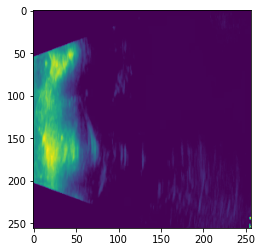

In [10]:
plt.imshow(img[120])
#(np.mean(labels,axis=0)))
print(res)

In [12]:
np.count_nonzero(ett_roi.classification_array)

14